In [62]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [63]:
import scipy
import scipy.misc
from scipy import stats
import numpy as np
import urllib
import skimage
import skimage.color
import skimage.io
import skimage.exposure
import skimage.data
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform as tf

# Gray-scale image

In [4]:
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"
# URL = "http://plzen.cz/kamera.php?0.8989779513794929"


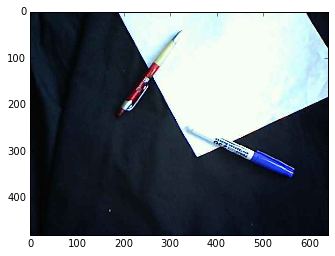

In [52]:
img = skimage.io.imread(URL)
plt.imshow(img)

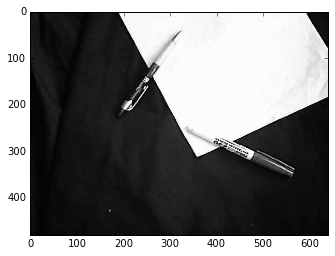

In [53]:
# from skimage import color
imggray = skimage.color.rgb2gray(img)
plt.imshow(imggray, cmap='gray')

# Histogram

In [54]:
data = np.random.random([3,2])
print data
print ' '
print data.ravel()

[[ 0.40413883  0.74198448]
 [ 0.47878333  0.59829801]
 [ 0.06001238  0.20204042]]
 
[ 0.40413883  0.74198448  0.47878333  0.59829801  0.06001238  0.20204042]


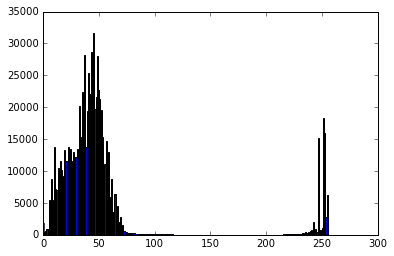

In [28]:
a, b, c = plt.hist(img.ravel(), 255)

(255,)
(256,)


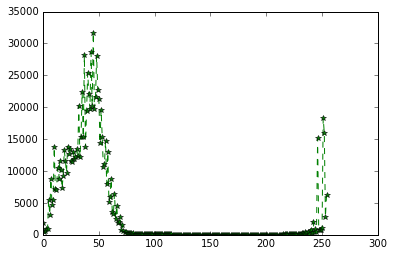

In [48]:
print a.shape
print b.shape
plt.plot(b[:-1], a, '*g--')



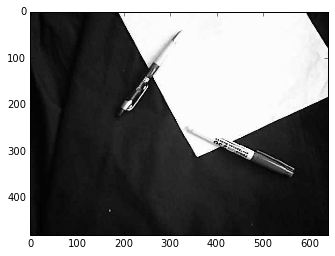

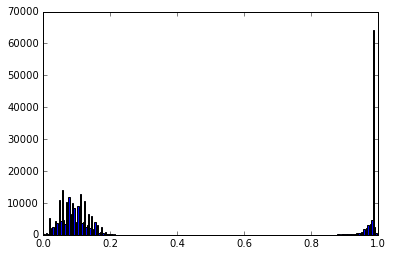

In [57]:

# import cv2

import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.misc
import urllib
import cStringIO

import matplotlib.pyplot as plt

# scipy.misc.imread(
URL = "http://uc452cam01-kky.fav.zcu.cz/snapshot.jpg"

file = cStringIO.StringIO(urllib.urlopen(URL).read())

img = scipy.misc.imread(file)

imgg = skimage.color.rgb2gray(img)
plt.imshow(imggray, cmap='gray')
plt.show()
a, b, c = plt.hist(imgg.ravel(),255)

# Zesvětlení

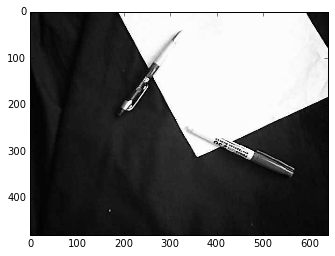

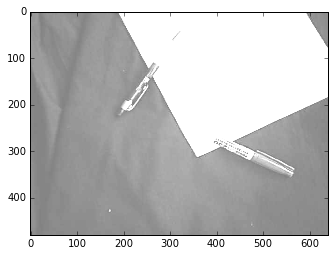

In [70]:
plt.figure()
plt.imshow(imgg, cmap='gray', clim=(0.0, 1.0))
plt.figure()
plt.imshow(imgg + 0.5, cmap='gray', clim=(0.0, 1.0))
# plt.colorbar()
plt.show()

# Zvýšení kontrastu

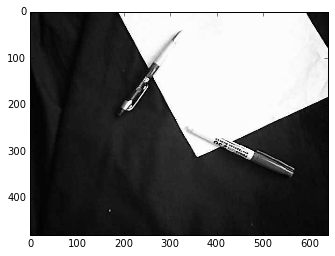

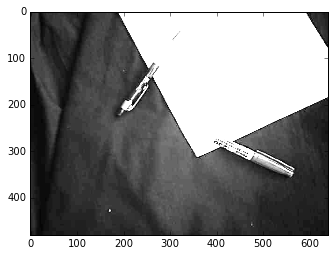

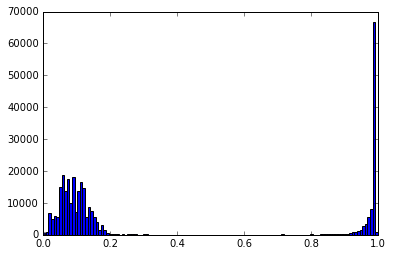

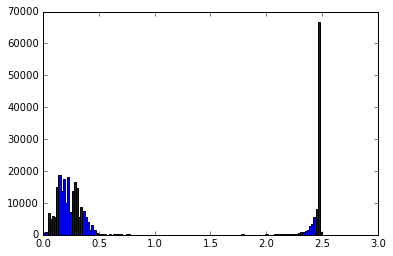

In [77]:
plt.figure()
plt.imshow(imgg, cmap='gray', clim=(0.0, 1.0))

plt.figure()
plt.imshow(2.5*imgg , cmap='gray', clim=(0.0, 1.0))
# plt.colorbar()
plt.figure()
plt.hist(imgg.ravel(),128)
plt.figure()
plt.hist((2.5*imgg).ravel(),128)
plt.show()


## Intensity rescale

[doc skimage.exposure_rescale_intensity](https://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.rescale_intensity)

DescribeResult(nobs=786432, minmax=(0, 255), mean=114.59900410970052, variance=6598.3809533703779, skewness=-0.10452421555212746, kurtosis=-1.4427232139571773)


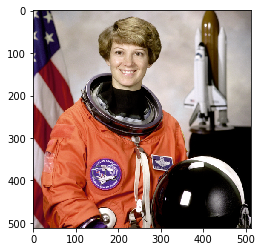

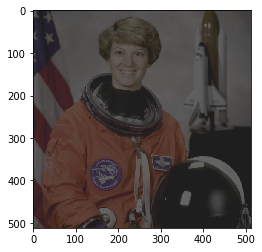

In [3]:
# img = skimage.color.rgb2gray(skimage.data.astronaut())
im = skimage.data.astronaut()
print(stats.describe(im, axis=None))
plt.imshow(im)
im_rescal = skimage.exposure.rescale_intensity(im, in_range=(0,255), out_range=(30,100))
plt.figure()
plt.imshow(im_rescal)

# Rotation and scale

[[35 32 29 29 32]
 [30 29 27 28 30]
 [29 30 30 30 29]
 [33 35 36 35 32]
 [32 34 36 36 35]]
[[ 17.5  16.   14.5  14.5  16. ]
 [ 15.   14.5  13.5  14.   15. ]
 [ 14.5  15.   15.   15.   14.5]
 [ 16.5  17.5  18.   17.5  16. ]
 [ 16.   17.   18.   18.   17.5]]


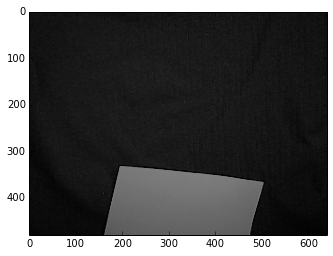

In [15]:
print imgg[:5,:5]
imgg05 = imgg*0.5
print imgg05[:5,:5]
plt.imshow(imgg05, cmap='gray', vmax=255, vmin=0)
plt.show()

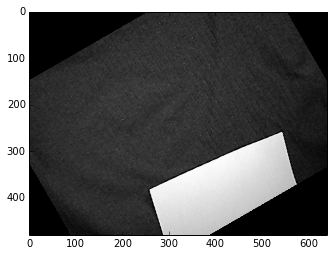

In [20]:
imr = scipy.misc.imrotate(imgg, 30)
plt.imshow(imr, cmap='gray')
plt.show()

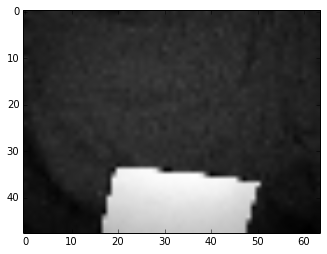

In [25]:
imgg_res = scipy.misc.imresize(imgg, 0.1)
plt.imshow(imgg_res, cmap='gray')
plt.show()

## Transform matrix

![Affine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2c/2D_affine_transformation_matrix.svg/449px-2D_affine_transformation_matrix.svg.png)

[Transformation matrix on wiky](https://en.wikipedia.org/wiki/Affine_transformation)

In [53]:
lena = skimage.io.imread("https://i.stack.imgur.com/3T6Gc.jpg")

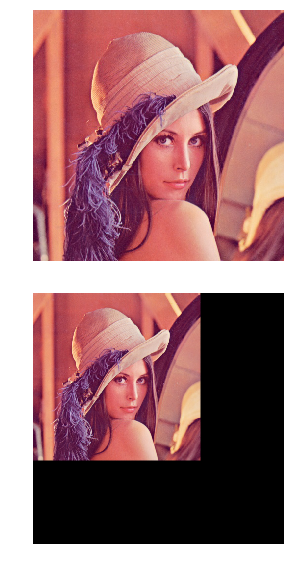

In [58]:
theta = np.pi/16
mat = np.array(
    [[1.5, 0, 0], 
     [0, 1.5, 0], 
     [0,              0,             1]]
)

tform0 = tf.ProjectiveTransform(matrix=mat)
warped = tf.warp(lena, tform0) 

fig, ax = plt.subplots(nrows=2, figsize=(10, 8))

ax[0].imshow(lena, cmap=plt.cm.gray)
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

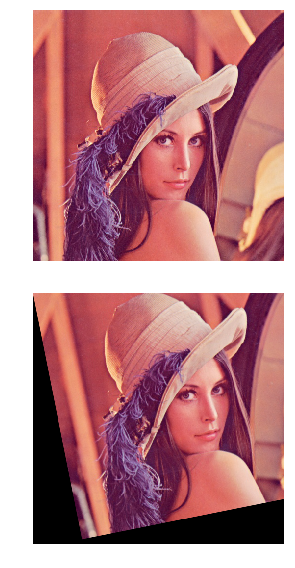

In [61]:
theta = np.pi/16
mat = np.array(
    [[np.cos(theta), -np.sin(theta), 0], 
     [np.sin(theta),  np.cos(theta), 0], 
     [0,              0,             1]]
)


tform0 = tf.ProjectiveTransform(matrix=mat)
warped = tf.warp(lena, tform0) #, output_shape=(600, 600))

fig, ax = plt.subplots(nrows=2, figsize=(8, 8))

ax[0].imshow(lena, cmap=plt.cm.gray)
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

## Transformation matrix parameters detection

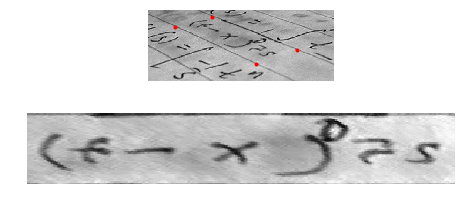

In [9]:

text = data.text()

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, ax = plt.subplots(nrows=2, figsize=(8, 3))

ax[0].imshow(text, cmap=plt.cm.gray)
ax[0].plot(dst[:, 0], dst[:, 1], '.r')
ax[1].imshow(warped, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.show()

In [11]:
tform3.params

array([[  5.25310835e-01,  -2.08383659e+00,   1.74271758e+02],
       [  2.35701599e-01,   5.25222025e-01,   1.68650089e+01],
       [ -6.74955595e-04,  -9.23623446e-04,   1.12433393e+00]])

# Thresholding

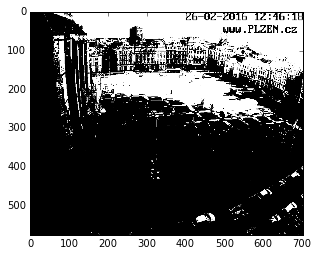

In [11]:
imthr = imggray > 0.5
plt.imshow(imthr, cmap='gray')

# Image counting

In [ ]:
import skimage.measure
imlabel = skimage.measure.label(imthr, background=0)
np.max(imlabel) + 1